In [9]:
%matplotlib inline
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img

In [99]:
CloudTop = np.load("X_train_CI20.npy")
TrueColor = np.load("Y_train_CI20.npy")
TrueColor.shape, CloudTop.shape

((8423, 127, 127, 3), (8423, 127, 127, 3))

Text(0.5, 1.0, 'Visible RGB')

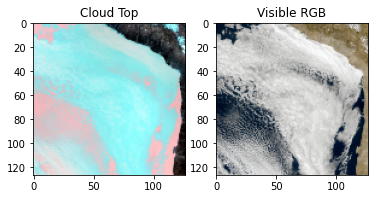

In [100]:
randindex=np.random.randint(0,TrueColor.shape[0]) #nice image at randindex = 5846
randindex=5847
plt.figure()
plt.subplot(1,2,1)
plt.imshow(array_to_img(CloudTop[randindex,:,:,:]))
plt.title('Cloud Top')

plt.subplot(1,2,2)
plt.imshow(array_to_img(TrueColor[randindex,:,:,:]))
plt.title('Visible RGB')

In [101]:
#data preprocessing
#how much of the data do we filter out?
np.sum(np.count_nonzero(TrueColor,axis=(1,2,3))<1000)/np.shape(TrueColor)[0]

0.483319482369702

In [102]:
TrueColorNZ = np.delete(TrueColor,np.count_nonzero(TrueColor,axis=(1,2,3))<1000,0)
CloudTopNZ = np.delete(CloudTop,np.count_nonzero(TrueColor,axis=(1,2,3))<1000,0)


In [103]:
CloudTopNZ_resh=CloudTopNZ.reshape(4352*127*127,3)

In [105]:
CloudTopNZ_resh.shape

(70193408, 3)

In [217]:
num_im=4352
end=127*127*num_im
Fit=CloudTopNZ_resh[0:end,:]

In [218]:
#k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(Fit)

In [219]:
pic=kmeans.labels_.reshape(num_im,127,127)

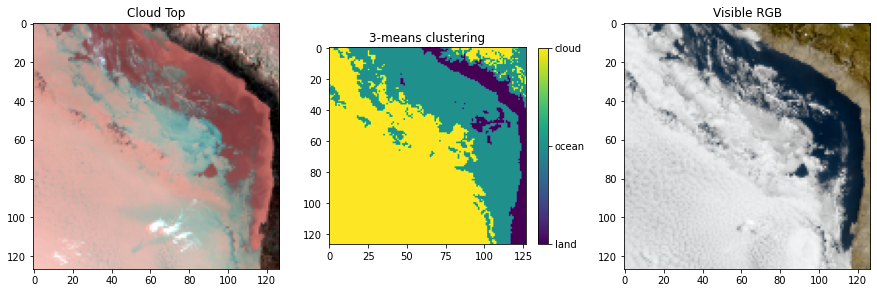

In [269]:
image_ind=1350

plt.figure(figsize=(15,45))

plt.subplot(1,3,1)
plt.imshow(array_to_img(CloudTopNZ[image_ind,:,:,:]))
plt.title('Cloud Top')

plt.subplot(1,3,2)
plt.imshow(pic[image_ind,:,:])
plt.title('3-means clustering')
cbar=plt.colorbar(shrink=0.08, ticks=[0,1,2])
cbar.ax.set_yticklabels(['land','ocean', 'cloud'])

plt.subplot(1,3,3)
plt.imshow(array_to_img(TrueColorNZ[image_ind,:,:,:]))
plt.title('Visible RGB')
plt.savefig("k-means.png", dpi=300)